In [1]:
%matplotlib notebook
%matplotlib notebook  
%load_ext autoreload
%autoreload 2

## Igor's speedy method...

In [2]:
from __future__ import print_function, absolute_import
from IPython import display
import math
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    make_mto,
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
    initial_conditions_random_all_dims,
)
from nn_system.networks import *

from igor import (
    do_igor_optimization,
    igor_traj_opt_serial,
    igor_traj_opt_parallel,
    igor_supervised_learning,
    igor_supervised_learning_cuda,
    visualize_intermediate_results,
)

## Applying to Pendulum

100 took 0.04s
0 took 0.11s
30 took 0.10s
50 took 0.12s
110 took 0.04s
70 took 0.11s
130 took 0.04s
140 took 0.05s
80 took 0.16s
40 took 0.17s
10 took 0.21s
20 took 0.21s
90 took 0.18s
120 took 0.11s
60 took 0.29s
144 144

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
('args: ', ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '0', '100', '5', '0.01'])
((144, 32), (144, 32, 2), (144, 32, 1))
((32,), (32, 2), (32, 1))
(True, 100, 5, 0.01)
(4464, 2)
(4464, 1)
[1,   100] loss: 0.001
[2,   100] loss: 0.000
[3,   100] loss: 0.000
[4,   100] loss: 0.000
[5,   100] loss: 0.000
Finished Training
('remote net params hash: ', 4301451299167843826)

rsyncing files back to local...
loading the new state dict...

local net params hash:  4301451299167843826


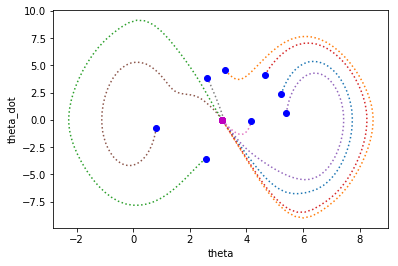

0 took 0.11s
50 took 0.07s
30 took 0.12s
70 took 0.05s
40 took 0.14s
110 took 0.03s
130 took 0.04s
100 took 0.07s
10 took 0.22s
140 took 0.05s
120 took 0.08s
80 took 0.15s
20 took 0.28s
90 took 0.16s
60 took 0.27s
144 144

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
('args: ', ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '0', '100', '5', '0.01'])
((144, 32), (144, 32, 2), (144, 32, 1))
((32,), (32, 2), (32, 1))
(True, 100, 5, 0.01)
(4464, 2)
(4464, 1)
[1,   100] loss: 0.000
[2,   100] loss: 0.000
[3,   100] loss: 0.000
[4,   100] loss: 0.000
[5,   100] loss: 0.000
Finished Training
('remote net params hash: ', 7399508863432966153)

rsyncing files back to local...
loading the new state dict...

local net params hash:  7399508863432966153


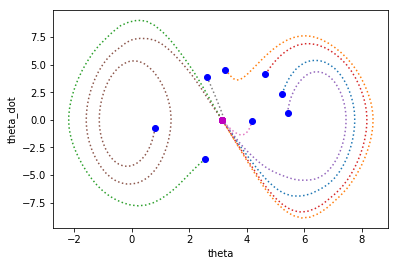

0 took 0.11s
50 took 0.12s
70 took 0.13s
40 took 0.15s
100 took 0.06s
30 took 0.17s
110 took 0.05s
10 took 0.19s
80 took 0.17s
130 took 0.04s
90 took 0.18s
140 took 0.06s
120 took 0.13s
20 took 0.32s
60 took 0.35s
144 144

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
('args: ', ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '0', '100', '5', '0.01'])
((144, 32), (144, 32, 2), (144, 32, 1))
((32,), (32, 2), (32, 1))
(True, 100, 5, 0.01)
(4464, 2)
(4464, 1)
[1,   100] loss: 0.000
[2,   100] loss: 0.000
[3,   100] loss: 0.000
[4,   100] loss: 0.000
[5,   100] loss: 0.000
Finished Training
('remote net params hash: ', 5751742447802251566)

rsyncing files back to local...
loading the new state dict...

local net params hash:  5751742447802251566


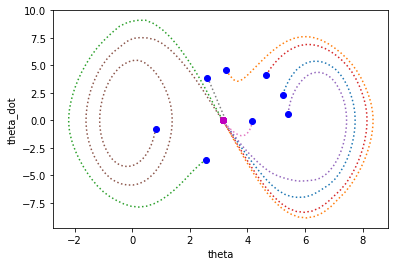

In [5]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
# Remember to change this on the GPU reciever side too!!!
def kNetConstructor():
#     return MLP(2, 32, layer_norm=True, dropout=True)
    return MLP(2, 32, layer_norm=False, dropout=False)
#     return MLP(2, 2, layer_norm=False)
#     return FCBIG(2, 2)
#     return FCBIG(2, 2)
net = kNetConstructor()
expmt = "pendulum"
ic_list=None

# warm_start=None
warm_start="linear"
# warm_start="random"
# warm_start="target"
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=True, warm_start=warm_start)

## Applying to Cartpole

In [3]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
    return MLP(4, 128, layer_norm=False)
net = kNetConstructor()
expmt = "cartpole"
ic_list=None

do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=None)

doing warm start
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
completed 10 trajectories
finished warm start
0 took 12.0779750347
retry result=SolutionResult.kInfeasibleConstraints
retry result=SolutionResult.kInfeasibleConstraints
retry result=SolutionResult.kInfeasibleConstraints
10 4


TypeError: expected string or Unicode object, NoneType found

## Applying to to Pendulum

In [ ]:
# First let's just see what Igor Optimization does on pendulum
net = FCBIG(2, 128)
expmt = "pendulum"
num_trajectories = # TODO: have some default for pendulum and cartpole
ic_list = initial_conditions_grid(num_trajectories, ) # TODO: have some default for pendulum and cartpole
do_igor_optimization(net, expmt, ic_list, warm_start=None, num_trajectories=num_trajectories)

In [ ]:
# Then let's experiment with the different minibatch schemes.
# First let's find a good batch size
ic_gen    = # Expmt default
n_iters   = 
inner_fn  = 
network   = 
traj_bank = []
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method1
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method2
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method3
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method4
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method5
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method6
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Now with adding dropout to favorite warm-starting scheme above


## Applying to to Cartpole

## Compare best method to VI solutions?

<IPython.core.display.Javascript object>


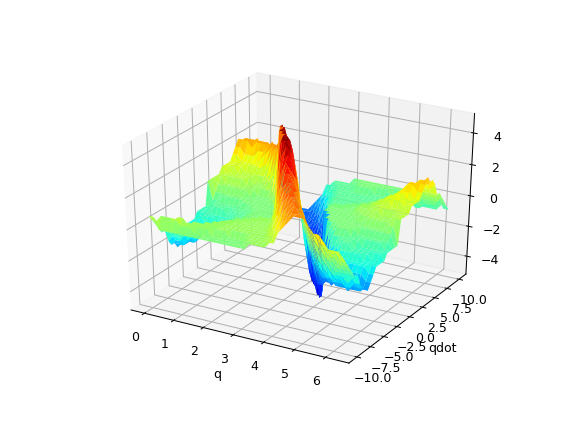

<IPython.core.display.Javascript object>


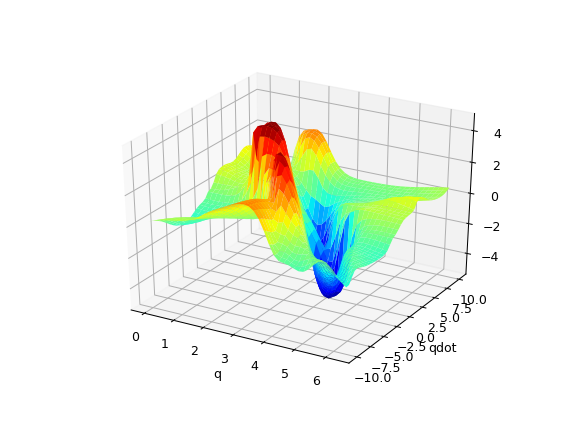

In [211]:
from traj.vi_utils import (
    load_vi_policy,
    vis_vi_policy,
    vis_nn_policy_like_vi_policy
)
vi_policy = load_vi_policy('good', "pendulum")
vis_vi_policy(vi_policy)
vis_nn_policy_like_vi_policy(net, vi_policy)

using_ics=  False
knot_MSE: [13.43466199], traj_MSE: [50.41605436]
[(80000, 2), (80000, 1), (80000, 1)]


<IPython.core.display.Javascript object>


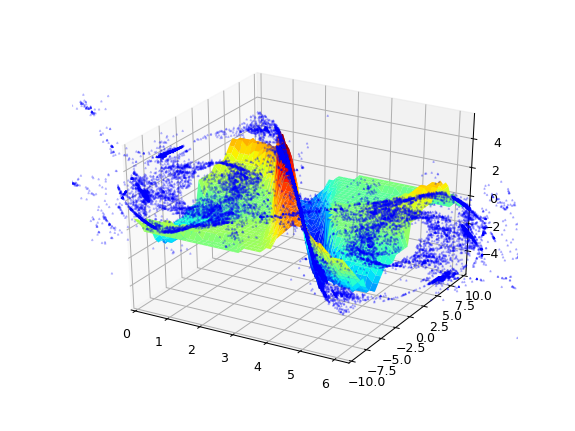

In [201]:
from traj.vi_utils import (graph_vi_policy_vs_traj_knot_scatter)

# ics_or_dircols = ics
ics_or_dircols = dircols
graph_vi_policy_vs_traj_knot_scatter(vi_policy, ics_or_dircols, 
                                     combine_vi_policy_and_scatter=True,
                                     plot_residual=False)